In [13]:
import numpy as np
import matplotlib.pyplot as plt

##### 1 - Погрешность приближения по производной

In [3]:
# f(x) = 3.0*x4 - 7.3*х2 - 5*x + 1.8

def f(x):
    return 3*x**4 - 7.3*x**2 - 5*x + 1.8

def df(x):
    return 12*x**3 - 14.6*x - 5

x = 2.0

print(df(x))

61.8


##### 2 - Метод Ньютона

In [6]:
# f(x) = 1.0*x4 - 8.7*х2 - 5*x + 1.1

def f(x):
    return 1.0*x**4 - 8.7*x**2 - 5*x + 1.1

def df(x):
    return 4*x**3 - 17.4*x - 5

def d2f(x):
    return 12*x**2 - 17.4

x = 2.9

x = x - df(x)/d2f(x)
print(x)
print(np.round(x, 2))

2.395977011494253
2.4


##### 3 - Метод дихотомии

In [11]:
# f(x) = 2.5*x2 - x*√3 + 3.6

def f(x):
    return 2.5*x**2 - np.sqrt(3)*x + 3.6

a = 0
b = 2
dx = 1e-5

for _ in range(3):
    x1 = (a+b)/2 - dx
    x2 = (a+b)/2 + dx
    f1 = f(x1)
    f2 = f(x2)

    if f1<f2:
        b = x2
    elif f1>f2:
        a = x1
    else:
        a = x1
        b = x2
    print( 'f1:', f1, 'f2:', f2)
    print('a:', a, 'b:', b)

print((0.25+0.5)/2)

f1: 4.367916513189199 f2: 4.367981872173047
a: 0 b: 1.00001
f1: 3.3589707565320994 f2: 3.3589861160159478
a: 0 b: 0.500015
f1: 3.323238503250425 f2: 3.3232288629842732
a: 0.24999749999999998 b: 0.500015
0.375


##### 4 - Золотое сечение

x1: 1.6424538483754523 x2: 2.6575461516245475
f1: 25.675954566682023 f2: 59.70991773564557
a: 0 b: 2.6575461516245475
(a+b)/2: 1.3287730758122738 1.33


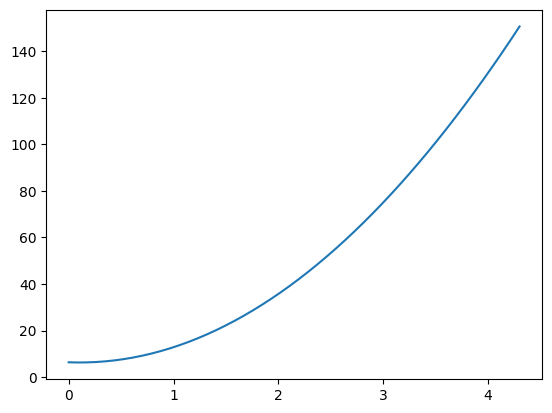

In [21]:
# f(x) = 8.2*x2 - x*√3 + 6.4. 

def f(x):
    return 8.2*x**2 - x*np.sqrt(3) + 6.4

a, b = 0, 4.3


# Метод золотого сечения
def gs(f, a, b, eps_x=0.025):
    nf = 0
    tau = (1 + np.sqrt(5))/2

    if (b-a)/2 > eps_x:
        coeff = (b-a)/tau
        x1 = b - coeff
        x2 = a + coeff
        f1 = f(x1)
        f2 = f(x2)

        print('x1:', x1, 'x2:', x2)
        print('f1:', f1, 'f2:', f2)

        if f1 < f2:
            b = x2
            x2 = x1
            coeff = (b-a)/tau
            x1 = b - coeff
            f2 = f1
            f1 = f(x1)
            nf += 1
        elif f1 > f2:
            a = x1
            x1 = x2
            coeff = (b-a)/tau
            x2 = a + coeff
            f1 = f2
            f2 = f(x2)
            nf += 1
        else:
            a = x1
            b = x2
            coeff = (b-a)/tau
            x1 = b - coeff
            x2 = a + coeff
            f1 = f(x1)
            f2 = f(x2)
            nf += 2

        print('a:', a, 'b:', b)
        print('(a+b)/2:', (a+b)/2, np.round((a+b)/2, 2))
    return (a+b)/2, (b-a)/2, nf

# print(gs(f, a, b))
gs(f, a, b)

x = np.linspace(a, b, 50)
plt.plot(x, f(x))

##### 5 - Погрешность по градиенту

In [22]:
# f(x,y) =3.2* x2 -5.8*х + y2

def f(x, y):
    return 3.2*x**2 - 5.8*x + y**2

def df(x, y):
    return (6.4*x - 5.8, 2*y)

x, y = 1.0, 0.6

grad = df(x, y)
print(grad)
print(np.linalg.norm(grad, ord=2))


(0.6000000000000005, 1.2)
1.341640786499874


##### 6 - Нелдер и Мид

In [37]:
# f(x,y) = x2 - 2х + y4

# v1(0;2), v2(0,4), v3(-1; 4.6)

def f(x, y):
    return x**2 - 2*x + y**4

Xsimplex = np.array([[0., 2.], [0., 4.], [-1., 4.6]])
print(Xsimplex)

s1 = Xsimplex[0]
s2 = Xsimplex[1]
s3 = Xsimplex[2]

print(f(*s1), f(*s2), f(*s3))

bad = s3
print('Bad:', bad)

center = (s1 + s2) /2
print('Center:', center)


news3 = center + (center - bad)
print('New:', news3)
print('X1:', f(*news3))

news3x2 = center + 2*(center - bad)
print('NewX2:', news3x2)
print('X2:', f(*news3x2))

[[ 0.   2. ]
 [ 0.   4. ]
 [-1.   4.6]]
16.0 256.0 450.74559999999985
Bad: [-1.   4.6]
Center: [0. 3.]
New: [1.  1.4]
X1: 2.8416000000000037
NewX2: [ 2.  -0.2]
X2: 0.0015999999999999773


##### 7 - Антиградиентное направление

In [42]:
#  f(x,y) =1.3* x2 -5.2*х + y4+1

def f(x, y):
    return 1.3*x**2 - 5.2*x + y**4 + 1

def df(x, y):
    return (2.6*x - 5.2, 4*y**3)

x, y = 0.9, 0.1

d = df(x, y)
print(d)

print('NewX:', x - d[0])
print('NewY:', y - d[1])

(-2.86, 0.004000000000000001)
NewX: 3.76
NewY: 0.096


##### 7.v2 - Антиградиентное направление с шагом 1

In [59]:
#  f(x,y) =1.3* x2 -5.2*х + y4+1

def f(x):
    return 1.3*x[0]**2 - 5.2*x[0] + x[1]**4 + 1

def df(x):
    return (2.6*x[0] - 5.2, 4*x[1]**3)

x = np.array([0.9, 0.1])

grd = df(x)
print('grd:', grd)

grdlength = np.linalg.norm(grd, ord=2)
print('grdlength:', grdlength)

normgrd = grd / grdlength
print('normgrd:', normgrd)

normgrdlength = np.linalg.norm(normgrd, ord=2)
print('normgrdlength:', normgrdlength)

newx = x - normgrd
print('newx:', newx)

grd: (-2.86, 0.004000000000000001)
grdlength: 2.860002797201429
normgrd: [-0.99999902  0.0013986 ]
normgrdlength: 1.0
newx: [1.89999902 0.0986014 ]


##### 8 - Метод Ньютона

In [48]:
# f(x,y) =1.3* x2 -5.2*х + y4+10


def newton(f, g, h, x0, eps_g=0.01, max_iters=1000):
    gv = g(x0)
    x_trace = [x0]
    iter = 0
    # while (norm(gv, ord=2) > eps_g) or (iter < max_iters):
    x = x_trace[-1].copy()
    hm = h(x)
    dx = np.linalg.solve(hm, -gv)
    x += dx
    return x
    # gv = g(x)
    # x_trace.append(x)
    # iter +=1
    # return np.array(x_trace)

def f(x):
    return 1.3*x[0]**2 - 5.2*x[0] + x[1]**4 + 10

def g(x):
    return np.array([2.6*x[0] - 5.2, 4*x[1]**3])

def h(x):
    return np.array([[2.6, 0],[0, 12*x[1]**2]])

x0 = np.array([0.9, 0.1])

print('f(x0):', f(x0))

res = newton(f, g, h, x0)
print('res:', res)
print('f(res):', f(res))

f(x0): 6.373099999999999
res: [2.         0.06666667]
f(res): 4.80001975308642
